---
#ANÁLISIS DE MACHINE LEARNING - COMERCIOS
#Google Colab / Jupyter Notebook
---

#
## 🤖 Análisis de Machine Learning para Comercios
# 
# Este notebook realiza:
# - Clustering K-Means
# - Reducción dimensional PCA
# - Análisis predictivo de expectativas
# - Generación de JSON para el dashboard

# 
# ## 📦 1. Instalar dependencias (solo necesario en Colab)

#
# Descomenta si estás en Google Colab
# !pip install pandas numpy scikit-learn

# 
# ## 📥 2. Cargar el archivo CSV


In [4]:
pip install matplotlib seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 8.3/8.3 MB 42.3 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 53.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------------------------------- 7.2/7.2 MB 76.4 MB/s  0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ----------------------------------

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


In [7]:
csv_path = r'C:\Users\juanc\OneDrive\Desktop\MIT-Proyect\datos_comercio.csv'

In [10]:
df = pd.read_csv(csv_path)
print("\n📋 Primeras 5 filas:")
display(df.head())


📋 Primeras 5 filas:


,fecha,equipo,comercio,imagen,tipo_comercio,reja,año_apertura,cantidad_trabajadores,trabajadores_salario_fijo,exp_trabajadores_3mes,...,hs_apertura,hs_cierre,consumo_kw,sexo_encuestado,telefono,local,estudios,edad,lat,long
0,2025-10-02 13:38:55,NaN,NaN,https://mit.co1.qualtrics.com/Q/File.php?F=F_9...,ALMACÉN,0,1980.0,1.0,0.0,Igual,...,9:00 am,8:30 pm,NaN,1,77124645.0,Propio,Primaria,Más de 60,NaN,-58.222781
1,2025-10-04 06:57:48,NaN,NaN,https://mit.co1.qualtrics.com/Q/File.php?F=F_2...,OTROS,0,2024.0,1.0,0.0,Aumente,...,8:30 am,8:30 pm,1012.0,1,50081170.0,Propio,Universidad y más,De 51 a 60,-34.577490,-58.430476
2,2025-10-04 07:50:56,NaN,NaN,https://mit.co1.qualtrics.com/Q/File.php?F=F_1...,DIETÉTICAS,0,1980.0,2.0,0.0,Igual,...,9:30 am,7:30 pm,NaN,0,32652189.0,Rentado,Universidad y más,Más de 60,-34.577034,-58.430847
3,2025-10-04 08:08:52,NaN,NaN,https://mit.co1.qualtrics.com/Q/File.php?F=F_3...,CONFITERÍA O PANADERÍA,0,1989.0,4.0,4.0,Igual,...,9:00 am,8:00 pm,NaN,1,26320744.0,Propio,Secundaria,De 51 a 60,-34.577045,-58.430689
4,2025-10-04 08:28:57,NaN,NaN,https://mit.co1.qualtrics.com/Q/File.php?F=F_1...,ALMACÉN,0,2022.0,5.0,5.0,Aumente,...,8:30 am,9:00 pm,NaN,0,26651956.0,Rentado,Secundaria,De 31 a 40,-34.577924,-58.429384


In [36]:
df_columns = df.columns
df_columns

Index(['fecha', 'equipo', 'comercio', 'imagen', 'tipo_comercio', 'reja',
       'año_apertura', 'cantidad_trabajadores', 'trabajadores_salario_fijo',
       'exp_trabajadores_3mes', 'venta_vs_mesantes', 'razon_ventas',
       'exp_ventas_3mes', 'inventario_vs_mesantes', 'exp_inventario_3mes',
       'nivel_inventario', 'precios', 'exp_precios_3mes', 'afect_crimen',
       'afect_credito', 'afect_precios', 'afect_compe', 'credits_bancos',
       'credits_proveedor', 'credits_familia', 'credits_gobierno',
       'credits_privado', 'credits_otro', 'razon_no_credito', 'quiere_crezca',
       'porque_no_crezca', 'min_salario', 'tecnologia', 'tecnologia_habitual',
       'hs_apertura', 'hs_cierre', 'consumo_kw', 'sexo_encuestado', 'telefono',
       'local', 'estudios', 'edad', 'lat', 'long', 'exp_ventas_positiva',
       'exp_inventario_positiva', 'exp_precios_positiva', 'expectativa_score'],
      dtype='object')

# 🔧 3. Preparación de Datos

In [11]:
# Crear copia para no modificar original
df_ml = df.copy()

In [21]:
df_ml.columns = df_ml.columns.str.strip()
df_mlcolumns = df_ml.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [12]:
# Variables para clustering
features_numericas = []

In [22]:
# 1. Cantidad de trabajadores
if 'cantidad_trabajadores' in df_ml.columns:
    df_ml['trabajadores_clean'] = pd.to_numeric(df_ml['cantidad_trabajadores'], errors='coerce')
    features_numericas.append('trabajadores_clean')
    print(f"✅ Variable agregada: trabajadores_clean")
    print(f"   Valores válidos: {df_ml['trabajadores_clean'].notna().sum()}")
    print(f"   Rango: {df_ml['trabajadores_clean'].min():.1f} - {df_ml['trabajadores_clean'].max():.1f}")
    print(f"   Promedio: {df_ml['trabajadores_clean'].mean():.1f}\n")

# 2. Horas de operación (CON CONVERSIÓN DE FORMATO)
if 'hs_apertura' in df_ml.columns and 'hs_cierre' in df_ml.columns:
    
    # Función para convertir horas en diferentes formatos
    def convertir_hora(hora_str):
        if pd.isna(hora_str):
            return np.nan
        
        # Si ya es un número, devolverlo
        try:
            return float(hora_str)
        except:
            pass
        
        # Convertir a string y limpiar
        hora_str = str(hora_str).strip().lower()
        
        # Formato "9:00 am" o "8:30 pm"
        if 'am' in hora_str or 'pm' in hora_str:
            try:
                # Remover am/pm
                hora_str = hora_str.replace('am', '').replace('pm', '').strip()
                
                # Separar hora y minutos
                if ':' in hora_str:
                    partes = hora_str.split(':')
                    hora = int(partes[0])
                    minutos = int(partes[1]) if len(partes) > 1 else 0
                else:
                    hora = int(float(hora_str))
                    minutos = 0
                
                # Convertir a formato 24h
                if 'pm' in str(hora_str).lower() and hora != 12:
                    hora += 12
                elif 'am' in str(hora_str).lower() and hora == 12:
                    hora = 0
                
                return hora + minutos / 60.0
            except:
                return np.nan
        
        # Formato "9.0" o "8.5"
        try:
            return float(hora_str)
        except:
            return np.nan
    
    # Aplicar conversión
    df_ml['apertura_clean'] = df_ml['hs_apertura'].apply(convertir_hora)
    df_ml['cierre_clean'] = df_ml['hs_cierre'].apply(convertir_hora)
    
    # Calcular horas de operación
    df_ml['horas_operacion'] = df_ml['cierre_clean'] - df_ml['apertura_clean']
    
    # Corregir casos donde cierre < apertura (cruza medianoche)
    df_ml.loc[df_ml['horas_operacion'] < 0, 'horas_operacion'] += 24
    
    # Solo agregar si hay valores válidos
    valores_validos = df_ml['horas_operacion'].notna().sum()
    if valores_validos > 0:
        features_numericas.append('horas_operacion')
        print(f"✅ Variable agregada: horas_operacion")
        print(f"   Valores válidos: {valores_validos}")
        print(f"   Rango: {df_ml['horas_operacion'].min():.1f} - {df_ml['horas_operacion'].max():.1f}")
        print(f"   Promedio: {df_ml['horas_operacion'].mean():.1f}\n")
    else:
        print(f"⚠️  horas_operacion: No se pudo calcular (formato de horas no reconocido)")
        print(f"   Muestra de hs_apertura: {df['hs_apertura'].head().tolist()}")
        print(f"   Muestra de hs_cierre: {df['hs_cierre'].head().tolist()}\n")

# 3. Acceso a crédito (binario)
if 'credito_formal' in df_ml.columns:
    df_ml['tiene_credito'] = df_ml['credito_formal'].apply(
        lambda x: 1 if str(x).lower() in ['sí', 'si', '1', 'true'] else 0
    )
    features_numericas.append('tiene_credito')
    print(f"✅ Variable agregada: tiene_credito")
    print(f"   Con crédito: {df_ml['tiene_credito'].sum()} ({df_ml['tiene_credito'].mean()*100:.1f}%)")
    print(f"   Sin crédito: {len(df_ml) - df_ml['tiene_credito'].sum()}\n")


✅ Variable agregada: trabajadores_clean
   Valores válidos: 853
   Rango: 1.0 - 10.0
   Promedio: 3.2

✅ Variable agregada: horas_operacion
   Valores válidos: 828
   Rango: 0.0 - 23.5
   Promedio: 10.0



In [26]:
# Filtrar datos válidos
df_clean = df_ml[features_numericas].dropna()

print("="*60)
print(f"📊 Datos listos para ML:")
print(f"   Comercios originales: {len(df_ml)}")
print(f"   Comercios con datos completos: {len(df_clean)}")

# VALIDACIÓN CRÍTICA
if len(df_clean) == 0:
    print("\n❌ ERROR: No hay datos válidos para análisis ML")
    print("\n🔍 Diagnóstico de problemas:")
    print("-" * 60)
    
    for feature in features_numericas:
        valid_count = df_ml[feature].notna().sum()
        invalid_count = df_ml[feature].isna().sum()
        print(f"\n📊 {feature}:")
        print(f"   ✅ Valores válidos: {valid_count} ({valid_count/len(df_ml)*100:.1f}%)")
        print(f"   ❌ Valores faltantes: {invalid_count} ({invalid_count/len(df_ml)*100:.1f}%)")
        
        if valid_count > 0:
            print(f"   📈 Muestra de valores válidos:")
            print(f"      {df_ml[feature].dropna().head().tolist()}")
        
        if invalid_count > 0:
            print(f"   🔍 Muestra de valores problemáticos:")
            problematic = df_ml[df_ml[feature].isna()].head(3)
            if feature == 'trabajadores_clean':
                print(f"      Originales: {problematic['cantidad_trabajadores'].tolist()}")
            elif feature == 'horas_operacion':
                print(f"      Apertura: {problematic['hs_apertura'].tolist()}")
                print(f"      Cierre: {problematic['hs_cierre'].tolist()}")
    
    print("\n💡 SOLUCIONES:")
    print("   1. Verifica que las columnas existan en tu CSV")
    print("   2. Revisa el formato de los datos (números vs texto)")
    print("   3. Considera usar imputación de valores faltantes")
    print("   4. Reduce las features requeridas")
    
    # Detener ejecución
    raise ValueError("No hay suficientes datos válidos para continuar el análisis ML")

print(f"   Tasa de completitud: {len(df_clean)/len(df_ml)*100:.1f}%")
print(f"   Features utilizadas: {len(features_numericas)}")
print(f"   Features: {features_numericas}")
print("="*60)

# Mostrar estadísticas descriptivas
print("\n📊 Estadísticas Descriptivas:")
display(df_clean.describe())

📊 Datos listos para ML:
   Comercios originales: 923
   Comercios con datos completos: 828
   Tasa de completitud: 89.7%
   Features utilizadas: 4
   Features: ['trabajadores_clean', 'horas_operacion', 'trabajadores_clean', 'horas_operacion']

📊 Estadísticas Descriptivas:


,trabajadores_clean,horas_operacion,trabajadores_clean,horas_operacion
count,828.000000,828.000000,828.000000,828.000000
mean,3.142512,10.035628,3.142512,10.035628
std,2.127491,10.412252,2.127491,10.412252
min,1.000000,0.000000,1.000000,0.000000
25%,2.000000,0.500000,2.000000,0.500000
50%,2.000000,3.000000,2.000000,3.000000
75%,4.000000,22.500000,4.000000,22.500000
max,10.000000,23.500000,10.000000,23.500000


# 🤖 4. Clustering K-Means

In [27]:
# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Aplicar K-Means con 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

print(f"✅ Clustering completado")
print(f"   Número de clusters: {n_clusters}")
print(f"   Inercia (cohesión): {kmeans.inertia_:.2f}")
print(f"   Iteraciones: {kmeans.n_iter_}\n")

✅ Clustering completado
   Número de clusters: 3
   Inercia (cohesión): 734.98
   Iteraciones: 4



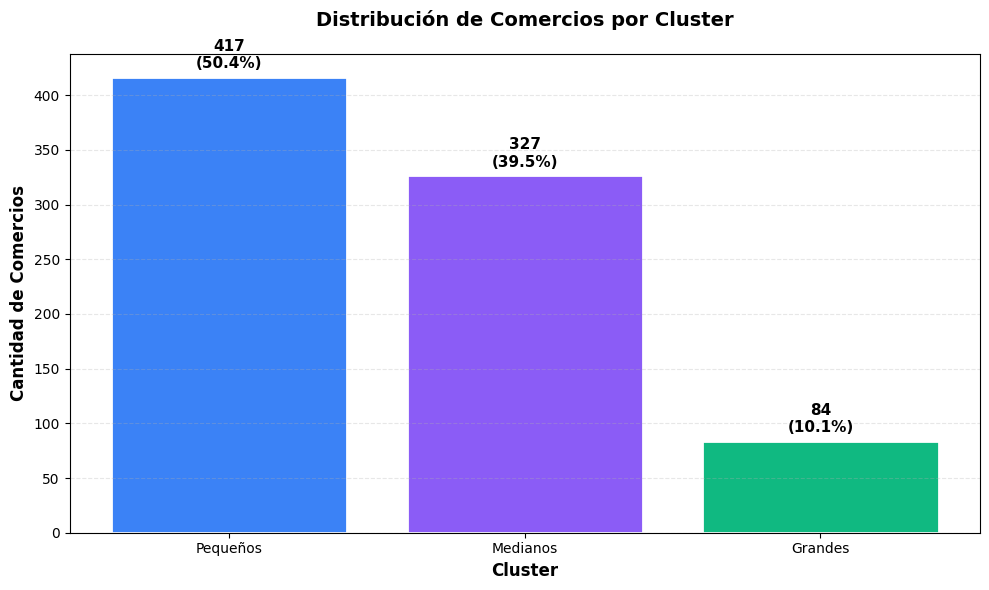

📊 Distribución:
   Cluster 0: 417 comercios (50.4%)
   Cluster 1: 327 comercios (39.5%)
   Cluster 2: 84 comercios (10.1%)


In [29]:
# Visualizar distribución
plt.figure(figsize=(10, 6))
cluster_counts = df_clean['cluster'].value_counts().sort_index()
colors = ['#3b82f6', '#8b5cf6', '#10b981']
bars = plt.bar(range(n_clusters), cluster_counts, color=colors, edgecolor='white', linewidth=2)

plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Comercios', fontsize=12, fontweight='bold')
plt.title('Distribución de Comercios por Cluster', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(n_clusters), ['Pequeños', 'Medianos', 'Grandes'])
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores encima de las barras
for i, (bar, v) in enumerate(zip(bars, cluster_counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{v}\n({v/len(df_clean)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"📊 Distribución:")
for i, count in enumerate(cluster_counts):
    print(f"   Cluster {i}: {count} comercios ({count/len(df_clean)*100:.1f}%)")

# 📊 5. Análisis Detallado de Clusters

In [30]:
print("\n📊 Análisis detallado de cada cluster:\n")
print("="*80)

cluster_labels = ['Pequeños', 'Medianos', 'Grandes']
cluster_info = []

for i in range(n_clusters):
    cluster_data = df_clean[df_clean['cluster'] == i]
    
    info = {
        'cluster_id': int(i),
        'label': cluster_labels[i],
        'count': int(len(cluster_data)),
        'porcentaje': round(len(cluster_data) / len(df_clean) * 100, 1)
    }
    
    # Estadísticas por feature
    if 'trabajadores_clean' in features_numericas:
        info['trabajadores_promedio'] = round(cluster_data['trabajadores_clean'].mean(), 1)
        info['trabajadores_mediana'] = round(cluster_data['trabajadores_clean'].median(), 1)
        info['trabajadores_min'] = round(cluster_data['trabajadores_clean'].min(), 1)
        info['trabajadores_max'] = round(cluster_data['trabajadores_clean'].max(), 1)
        info['trabajadores_std'] = round(cluster_data['trabajadores_clean'].std(), 1)
    
    if 'horas_operacion' in features_numericas:
        info['horas_promedio'] = round(cluster_data['horas_operacion'].mean(), 1)
        info['horas_mediana'] = round(cluster_data['horas_operacion'].median(), 1)
        info['horas_min'] = round(cluster_data['horas_operacion'].min(), 1)
        info['horas_max'] = round(cluster_data['horas_operacion'].max(), 1)
    
    if 'tiene_credito' in features_numericas:
        info['porcentaje_credito'] = round(cluster_data['tiene_credito'].mean() * 100, 1)
        info['con_credito'] = int(cluster_data['tiene_credito'].sum())
        info['sin_credito'] = int(len(cluster_data) - cluster_data['tiene_credito'].sum())
    
    cluster_info.append(info)
    
    print(f"🏪 CLUSTER {i}: {cluster_labels[i]}")
    print("-"*80)
    print(f"   📈 Cantidad: {info['count']} comercios ({info['porcentaje']}% del total)")
    
    if 'trabajadores_promedio' in info:
        print(f"\n   👥 Trabajadores:")
        print(f"      • Promedio: {info['trabajadores_promedio']}")
        print(f"      • Mediana: {info['trabajadores_mediana']}")
        print(f"      • Rango: {info['trabajadores_min']} - {info['trabajadores_max']}")
        print(f"      • Desv. Estándar: {info['trabajadores_std']}")
    
    if 'horas_promedio' in info:
        print(f"\n   ⏰ Horas de operación:")
        print(f"      • Promedio: {info['horas_promedio']}h")
        print(f"      • Mediana: {info['horas_mediana']}h")
        print(f"      • Rango: {info['horas_min']}h - {info['horas_max']}h")
    
    if 'porcentaje_credito' in info:
        print(f"\n   💰 Acceso a crédito:")
        print(f"      • Con crédito: {info['con_credito']} ({info['porcentaje_credito']}%)")
        print(f"      • Sin crédito: {info['sin_credito']} ({100-info['porcentaje_credito']:.1f}%)")
    
    print("\n" + "="*80 + "\n")



📊 Análisis detallado de cada cluster:

🏪 CLUSTER 0: Pequeños
--------------------------------------------------------------------------------
   📈 Cantidad: 417 comercios (50.4% del total)

   👥 Trabajadores:
      • Promedio: trabajadores_clean    2.6
trabajadores_clean    2.6
dtype: float64
      • Mediana: trabajadores_clean    2.0
trabajadores_clean    2.0
dtype: float64
      • Rango: trabajadores_clean    1.0
trabajadores_clean    1.0
dtype: float64 - trabajadores_clean    5.0
trabajadores_clean    5.0
dtype: float64
      • Desv. Estándar: trabajadores_clean    1.2
trabajadores_clean    1.2
dtype: float64

   ⏰ Horas de operación:
      • Promedio: horas_operacion    1.3
horas_operacion    1.3
dtype: float64h
      • Mediana: horas_operacion    0.5
horas_operacion    0.5
dtype: float64h
      • Rango: horas_operacion    0.0
horas_operacion    0.0
dtype: float64h - horas_operacion    10.5
horas_operacion    10.5
dtype: float64h


🏪 CLUSTER 1: Medianos
---------------------------

# 📈 6. Visualización con PCA

✅ PCA completado
   Componentes: 2
   Varianza explicada por PC1: 56.1%
   Varianza explicada por PC2: 43.9%
   Varianza total explicada: 100.0%



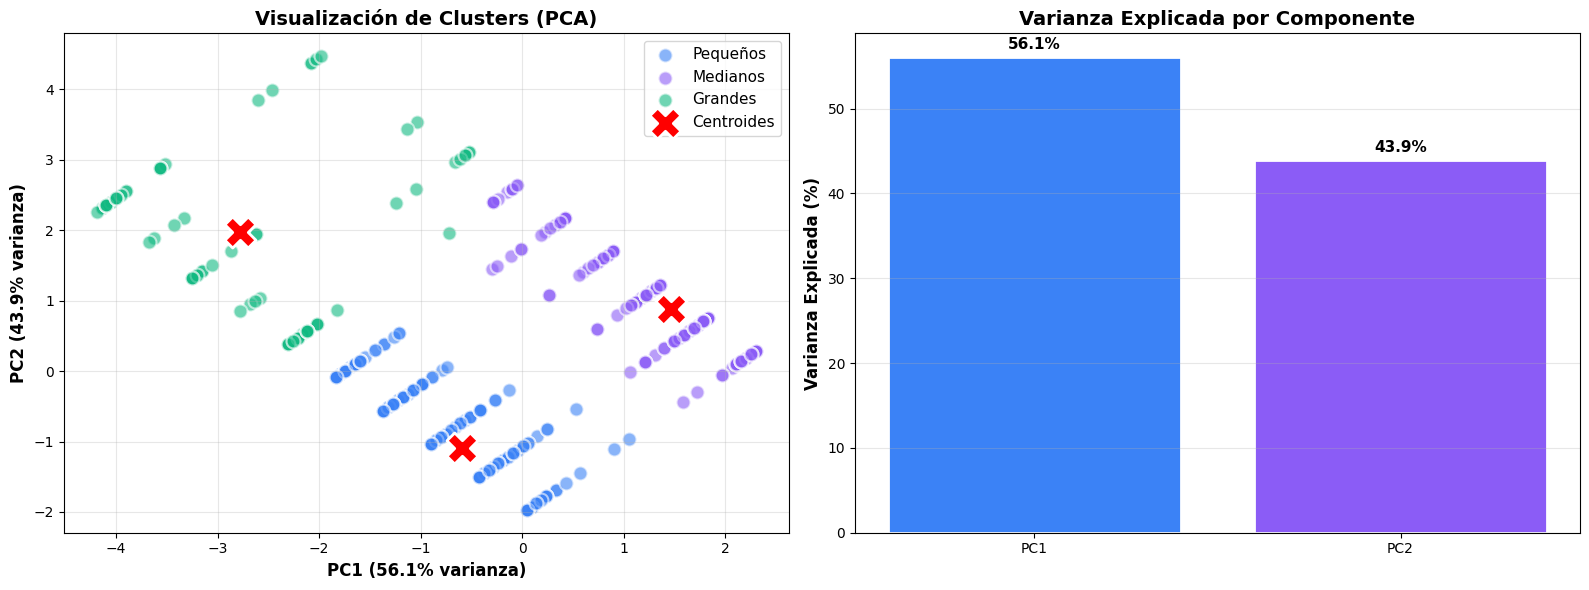

In [31]:
# Aplicar PCA para visualización en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"✅ PCA completado")
print(f"   Componentes: 2")
print(f"   Varianza explicada por PC1: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"   Varianza explicada por PC2: {pca.explained_variance_ratio_[1]*100:.1f}%")
print(f"   Varianza total explicada: {sum(pca.explained_variance_ratio_)*100:.1f}%\n")

# Visualizar clusters en espacio PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Scatter plot de clusters
colors_map = {0: '#3b82f6', 1: '#8b5cf6', 2: '#10b981'}
labels_map = {0: 'Pequeños', 1: 'Medianos', 2: 'Grandes'}

for cluster_id in range(n_clusters):
    mask = df_clean['cluster'] == cluster_id
    ax1.scatter(
        X_pca[mask, 0], 
        X_pca[mask, 1], 
        c=colors_map[cluster_id],
        label=labels_map[cluster_id],
        alpha=0.6,
        s=100,
        edgecolors='white',
        linewidth=1.5
    )

# Plotear centroides
centroides_pca = pca.transform(kmeans.cluster_centers_)
ax1.scatter(
    centroides_pca[:, 0], 
    centroides_pca[:, 1], 
    c='red', 
    marker='X', 
    s=500, 
    edgecolors='white',
    linewidth=2,
    label='Centroides',
    zorder=10
)

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)', 
               fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)', 
               fontsize=12, fontweight='bold')
ax1.set_title('Visualización de Clusters (PCA)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Varianza explicada
ax2.bar(['PC1', 'PC2'], pca.explained_variance_ratio_ * 100, 
        color=['#3b82f6', '#8b5cf6'], edgecolor='white', linewidth=2)
ax2.set_ylabel('Varianza Explicada (%)', fontsize=12, fontweight='bold')
ax2.set_title('Varianza Explicada por Componente', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(pca.explained_variance_ratio_ * 100):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


In [32]:
# Preparar datos PCA para JSON
pca_data = []
for idx, row in enumerate(X_pca):
    pca_data.append({
        'x': float(row[0]),
        'y': float(row[1]),
        'cluster': int(df_clean.iloc[idx]['cluster'])
    })

# 🔮 7. Análisis Predictivo de Expectativas


🔮 Análisis de Expectativas Futuras...

✅ Análisis de expectativas completado

📊 Expectativas positivas:
   • Ventas: 584 comercios (63.3%)
   • Inventario: 0 comercios (0.0%)
   • Precios: 471 comercios (51.0%)

   💯 Score promedio: 0.38
   📋 Total analizados: 923


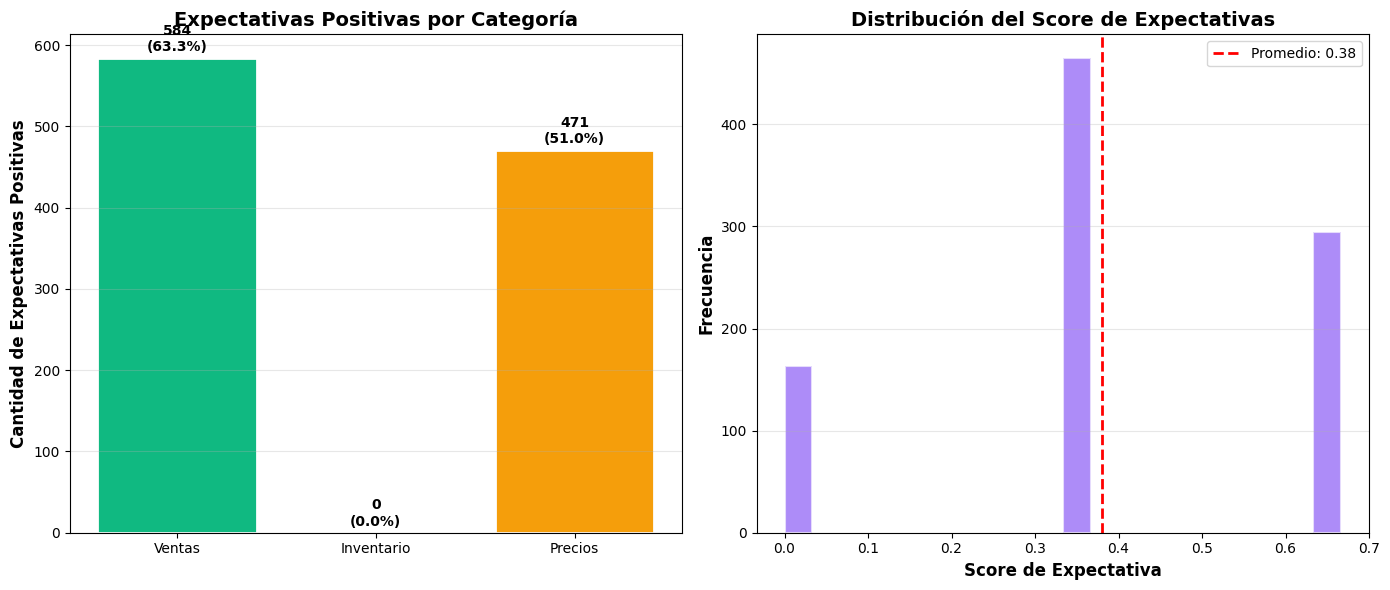

In [33]:
print("\n🔮 Análisis de Expectativas Futuras...\n")

expectativas_analisis = None

if all(col in df.columns for col in ['exp_ventas_3mes', 'exp_inventario_3mes', 'exp_precios_3mes']):
    
    # Función para clasificar expectativas
    def clasificar_expectativa(texto):
        if pd.isna(texto):
            return 0
        texto = str(texto).lower()
        palabras_positivas = ['aument', 'crec', 'mejor', 'más', 'subir', 'mayor']
        return 1 if any(palabra in texto for palabra in palabras_positivas) else 0
    
    df['exp_ventas_positiva'] = df['exp_ventas_3mes'].apply(clasificar_expectativa)
    df['exp_inventario_positiva'] = df['exp_inventario_3mes'].apply(clasificar_expectativa)
    df['exp_precios_positiva'] = df['exp_precios_3mes'].apply(clasificar_expectativa)
    
    # Score de expectativa (promedio de las 3)
    df['expectativa_score'] = (
        df['exp_ventas_positiva'] + 
        df['exp_inventario_positiva'] + 
        df['exp_precios_positiva']
    ) / 3
    
    expectativas_analisis = {
        'ventas_positivas': int(df['exp_ventas_positiva'].sum()),
        'inventario_positivo': int(df['exp_inventario_positiva'].sum()),
        'precios_positivos': int(df['exp_precios_positiva'].sum()),
        'score_promedio': round(df['expectativa_score'].mean(), 2),
        'total_analizados': int(df['expectativa_score'].notna().sum())
    }
    
    print("✅ Análisis de expectativas completado\n")
    print(f"📊 Expectativas positivas:")
    print(f"   • Ventas: {expectativas_analisis['ventas_positivas']} comercios ({expectativas_analisis['ventas_positivas']/len(df)*100:.1f}%)")
    print(f"   • Inventario: {expectativas_analisis['inventario_positivo']} comercios ({expectativas_analisis['inventario_positivo']/len(df)*100:.1f}%)")
    print(f"   • Precios: {expectativas_analisis['precios_positivos']} comercios ({expectativas_analisis['precios_positivos']/len(df)*100:.1f}%)")
    print(f"\n   💯 Score promedio: {expectativas_analisis['score_promedio']}")
    print(f"   📋 Total analizados: {expectativas_analisis['total_analizados']}")
    
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Gráfico 1: Barras de expectativas
    categorias = ['Ventas', 'Inventario', 'Precios']
    valores = [
        expectativas_analisis['ventas_positivas'],
        expectativas_analisis['inventario_positivo'],
        expectativas_analisis['precios_positivos']
    ]
    colors_exp = ['#10b981', '#3b82f6', '#f59e0b']
    
    bars = ax1.bar(categorias, valores, color=colors_exp, edgecolor='white', linewidth=2)
    ax1.set_ylabel('Cantidad de Expectativas Positivas', fontsize=12, fontweight='bold')
    ax1.set_title('Expectativas Positivas por Categoría', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    
    for i, (bar, v) in enumerate(zip(bars, valores)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{v}\n({v/len(df)*100:.1f}%)',
                 ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Gráfico 2: Distribución del score
    ax2.hist(df['expectativa_score'].dropna(), bins=20, color='#8b5cf6', 
             edgecolor='white', linewidth=1.5, alpha=0.7)
    ax2.axvline(expectativas_analisis['score_promedio'], color='red', 
                linestyle='--', linewidth=2, label=f'Promedio: {expectativas_analisis["score_promedio"]}')
    ax2.set_xlabel('Score de Expectativa', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
    ax2.set_title('Distribución del Score de Expectativas', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se encontraron las columnas de expectativas en el dataset")

# 🔗 8. Matriz de Correlaciones


🔗 Calculando correlaciones...

📊 Matriz de Correlación:


,trabajadores_clean,trabajadores_clean,horas_operacion,horas_operacion,trabajadores_clean,trabajadores_clean,horas_operacion,horas_operacion
trabajadores_clean,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383
trabajadores_clean,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383
horas_operacion,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000
horas_operacion,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000
trabajadores_clean,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383
trabajadores_clean,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383
horas_operacion,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000
horas_operacion,-0.121383,-0.121383,1.000000,1.000000,-0.121383,-0.121383,1.000000,1.000000



🔗 Correlaciones encontradas:
   🟢 trabajadores_clean_vs_horas_operacion: 1.0 (Fuerte)
   ⚪ trabajadores_clean_vs_trabajadores_clean: -0.121 (Débil)
   ⚪ horas_operacion_vs_trabajadores_clean: -0.121 (Débil)
   ⚪ horas_operacion_vs_horas_operacion: -0.121 (Débil)


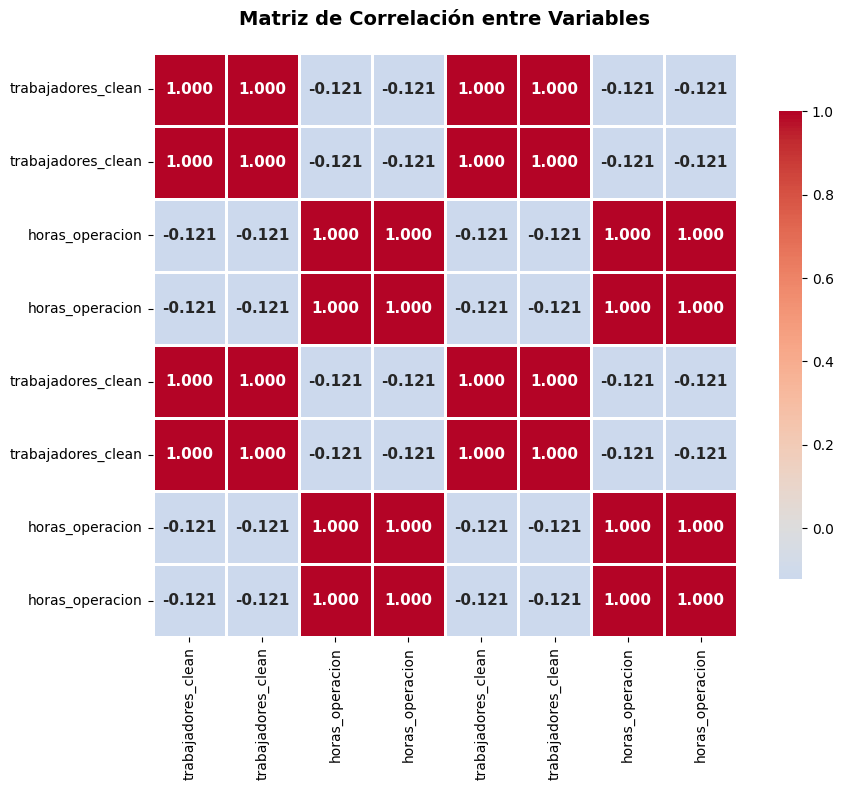

In [39]:
print("\n🔗 Calculando correlaciones...\n")

correlaciones = {}
if len(features_numericas) > 1:
    corr_matrix = df_clean[features_numericas].corr()
    
    print("📊 Matriz de Correlación:")
    display(corr_matrix)
    print()
    
    # Obtener correlaciones directamente de la matriz
    for i, col1 in enumerate(features_numericas):
        for j, col2 in enumerate(features_numericas):
            if j > i:  # Solo la parte superior de la matriz
                key = f"{col1}_vs_{col2}"
                # Usar .iloc con índices numéricos
                valor = corr_matrix.iloc[i, j]
                # Convertir a float nativo de Python
                correlaciones[key] = float(round(valor, 3))
    
    print("🔗 Correlaciones encontradas:")
    for key, value in correlaciones.items():
        emoji = "🟢" if abs(value) > 0.5 else "🟡" if abs(value) > 0.3 else "⚪"
        interpretacion = "Fuerte" if abs(value) > 0.5 else "Moderada" if abs(value) > 0.3 else "Débil"
        print(f"   {emoji} {key}: {value} ({interpretacion})")
    
    # Visualizar heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=2, cbar_kws={"shrink": 0.8},
                fmt='.3f', annot_kws={'fontsize': 11, 'fontweight': 'bold'})
    plt.title('Matriz de Correlación entre Variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Se necesitan al menos 2 variables para calcular correlaciones")
    print(f"   Variables disponibles: {len(features_numericas)}")


In [41]:
print("\n💾 Generando archivo JSON para el dashboard...\n")

# Función auxiliar para convertir a tipos JSON serializables
def convertir_a_json_serializable(obj):
    """Convierte objetos pandas/numpy a tipos nativos de Python"""
    import numpy as np
    
    if isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, pd.Series):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {k: convertir_a_json_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convertir_a_json_serializable(item) for item in obj]
    else:
        return obj

# Convertir cluster_info a tipos serializables
cluster_info_serializable = []
for cluster in cluster_info:
    cluster_limpio = {}
    for key, value in cluster.items():
        cluster_limpio[key] = convertir_a_json_serializable(value)
    cluster_info_serializable.append(cluster_limpio)

resultado = {
    'metadata': {
        'total_comercios': int(len(df)),
        'comercios_analizados': int(len(df_clean)),
        'features_utilizadas': features_numericas,
        'fecha_analisis': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'archivo_origen': csv_path
    },
    'clustering': {
        'n_clusters': int(n_clusters),
        'inercia': float(kmeans.inertia_),
        'iteraciones': int(kmeans.n_iter_),
        'clusters': cluster_info_serializable,
        'distribucion': [int(len(df_clean[df_clean['cluster'] == i])) for i in range(n_clusters)]
    },
    'pca': {
        'varianza_explicada': [float(x) for x in pca.explained_variance_ratio_],
        'varianza_total': float(sum(pca.explained_variance_ratio_)),
        'datos': pca_data[:100]  # Limitar para tamaño del JSON
    },
    'expectativas': convertir_a_json_serializable(expectativas_analisis) if expectativas_analisis else None,
    'correlaciones': correlaciones
}

# Guardar JSON
output_path = 'ml_results.json'
json_str = json.dumps(resultado, indent=2, ensure_ascii=False)

with open(output_path, 'w', encoding='utf-8') as f:
    f.write(json_str)

print(f"✅ Archivo JSON generado: {output_path}")
print(f"📍 Ubicación: {os.path.abspath(output_path)}")
print(f"📦 Tamaño: {len(json_str) / 1024:.2f} KB")
print(f"📊 Registros incluidos: {len(resultado['pca']['datos'])} puntos PCA")

# Verificar estructura del JSON
print(f"\n📋 Estructura del JSON:")
print(f"   • Metadata: ✅")
print(f"   • Clustering: ✅ ({len(cluster_info_serializable)} clusters)")
print(f"   • PCA: ✅ ({len(resultado['pca']['datos'])} puntos)")
print(f"   • Expectativas: {'✅' if expectativas_analisis else '❌'}")
print(f"   • Correlaciones: ✅ ({len(correlaciones)} pares)")

print("\n" + "="*80)
print("🎉 ¡Análisis completado exitosamente!")
print("="*80)


💾 Generando archivo JSON para el dashboard...

✅ Archivo JSON generado: ml_results.json
📍 Ubicación: c:\Users\juanc\OneDrive\Desktop\MIT-Proyect\ml_results.json
📦 Tamaño: 13.50 KB
📊 Registros incluidos: 100 puntos PCA

📋 Estructura del JSON:
   • Metadata: ✅
   • Clustering: ✅ (3 clusters)
   • PCA: ✅ (100 puntos)
   • Expectativas: ✅
   • Correlaciones: ✅ (4 pares)

🎉 ¡Análisis completado exitosamente!
